In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
#from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn import metrics

In [3]:
df = pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/DATASET/TM.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,121.519997,122.260002,120.169998,121.459999,117.422958,413500
1,2016-01-05,121.540001,121.540001,120.160004,121.139999,117.113594,306400
2,2016-01-06,118.570000,118.800003,117.760002,118.379997,114.445328,277600
3,2016-01-07,116.080002,116.639999,115.459999,115.570000,111.728729,407500
4,2016-01-08,116.320000,116.680000,112.919998,113.059998,109.302155,635800


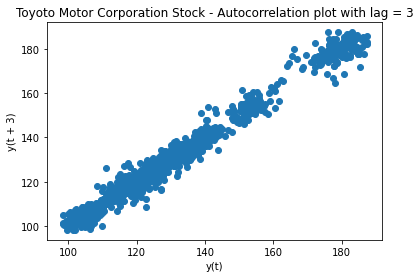

In [4]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('Toyoto Motor Corporation Stock - Autocorrelation plot with lag = 3')
plt.show()

In [5]:
int(len(df)*0.7)

1057

In [6]:
df.shape

(1510, 7)

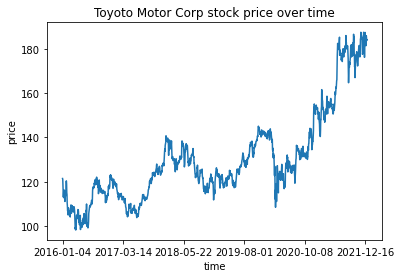

In [7]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1510, 300), df['Date'][0:1510:300])
plt.title("Toyoto Motor Corp stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [8]:
# divide the data into a training (70%) and test (30%) set.
#p=4, d=1, q=0
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


In [9]:
MAE_error = metrics.mean_absolute_error(test_data, model_predictions)
RMSE_error = np.sqrt(metrics.mean_squared_error(test_data, model_predictions))
MSE_error = metrics.mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))
print('Testing Root Mean Squared Error is {}'.format(RMSE_error))

Testing Mean Squared Error is 5.084132672778966
Testing Mean Absolute Error is 1.6685098392110547
Testing Root Mean Squared Error is 2.254802136059607


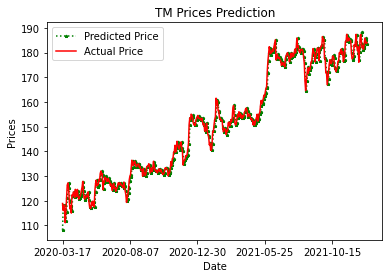

In [10]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='green', marker='*',markersize=3, linestyle='dotted',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TM Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(1057,1510,100), df.Date[1057:1510:100])
plt.legend()
plt.show()

In [11]:
arr = np.array(model_predictions)
print(arr)

[108.19151445 118.20114033 116.58037526 118.19668417 116.55193109
 111.6232515  115.42416446 121.07056169 126.43643226 127.15902944
 125.1080634  119.87429429 116.63832475 117.8704692  115.66093183
 121.97416657 122.29668248 123.43718697 122.88616681 121.41318446
 124.11776039 123.37002414 121.9510025  124.04546682 122.27521656
 120.6665248  121.09748436 121.99389006 122.58911087 124.0364475
 125.43383708 127.6348388  123.86960978 120.92435472 120.46590788
 122.32426121 121.9181531  121.5187711  122.86210509 123.69189964
 120.42963691 117.6216202  116.93440413 117.24936927 119.54163453
 118.50729936 119.58298788 117.94337988 117.5844559  123.47122614
 127.09187255 128.24190891 125.48376647 126.006084   126.41640896
 128.79028219 128.24997453 130.79397387 131.93561518 130.69620369
 130.60231885 124.86717439 127.39533934 127.77358813 129.95936315
 128.71637787 129.02015256 127.71361141 128.10126118 129.06236969
 128.06707003 127.63746496 126.24107705 126.88561466 125.83486559
 124.326092

In [12]:
df = pd.DataFrame(arr, columns =['Open'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,Open
0,108.191514
1,118.201140
2,116.580375
3,118.196684
4,116.551931
...,...
448,181.856674
449,183.722523
450,186.007433
451,184.993033


In [13]:
df.to_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_TM.csv",index=None)
df.head(5)

,Open
0,108.191514
1,118.201140
2,116.580375
3,118.196684
4,116.551931
